# Progress report

### Project Introduction
Our data science term project aims to model the impact of COVID-19 in Chicago neighborhoods, using sociodemographic data (age, income, education etc.) and COVID-19 statistics (hospitalizations, deaths etc.). The sociodemographic and COVID-19 data used here is for each zipcode within Chicago. An existing COVID-19 model, the CCVI score, ranks neighborhoods in Chicago by vulnerability based on several sociodemographic factors, and develops an overall vulnerability score for each neighborhood based on these rankings. An issue with this ranking system is that the difference in factors is not accurately reflected by a difference in ranks; for example, two neighborhoods could have a relatively big difference in income but only be a rank apart, and vice versa (relatively small difference in income and a rank apart). The ranking-based score would normalize all differences in sociodemographic factors when calculating the vulnerability score, which could be a potential issue when deciding on how to accurately and precisely distribute resources to areas based on their COVID-19 vulnerability. Our model seeks to improve upon the CCVI score by assessing areas in a more absolute way, such that it can predict COVID-19 risk of an area in terms of cases, hospitalizations or deaths, given the sociodemographic factors of that area. 
We chose to develop the model for Chicago both because of our proximity to the city, and because Chicago has been a big COVID-19 hotspot in America during the last two years. Being a big, densely populated city, Chicago has had 567,470 COVID-19 cases, 41,694 hospitalizations and 7,635 deaths as of today. Despite these high numbers, the impact of COVID-19 has been unevenly distributed over the city of Chicago, and is primarily dictated by the sociodemographic factors that we are inspecting in our project. Since our model aims to predict COVID-19 impact from sociodemographic data, it can potentially help organizations distribute resources, healthcare and vaccination efforts in the city more accurately, as well as help policy-makers understand how the pandemic impact is affected by disparities in the city, and plan accordingly in the future to remedy this.


### Changes from Original Proposal
One change that we plan to do now is to expand our model by exploring and incorporating data from the entire state of Illinois, not just the city of Chicago. The city of Chicago contains around 60 ZIP codes, which results in a model which is not very accurate due to the low number of data points. The state of Illinois covers 1366 ZIP code areas, which gives us sufficient data to build a more robust model that can perform better than our current model. We could also potentially incorporate data from other big cities and states in America to have more data points to train our model with.

### Data cleaning
Data cleaning is done in wrangle.py file. The following steps were performed to clean the dataset.
- Chicago Covid death and case related data was available for individual zipcodes. However, sociodemographic data was available for individual counties or census tracts. To match granularity, we scraped zipcode based Sociodemographic data of Chicago from CensusReporter website. An example of how the sociodemographics data looks like can be seen here: https://censusreporter.org/profiles/86000US60607-60607/.
- There were few Covid death related data instances where 'Manner of Death' was 'ACCIDENT' or 'SUICIDE'. We removed those instances.
- Chicago's zipcode based boundary data was collected from Chicago Data Portal. There were some instances in both Covid death and case related data where the zipcode was found to be outside Chicago. We removed those instances.
- Converted the date columns to datetime type. 
- Removed unneeded columns from both Covid case and death datasets.
- Aggregated Covid deaths and cases for all the zipcodes.
- Merged Covid deaths and cases with Sociodemographic data.
- Normalized Covid deaths and cases by each zipcode's population (ie: case per 1,000 / death per 1,000). Rounded the values to two decimal points.
- The cleaned dataset is stored in "Chicago-Covid-SocioDemographics-Cases-Deaths.csv" file.
- Dataset cleaning operation can be performed by creating an object of Wrangle class and then simply calling the function MergeSocCovid (shown below). Takes a minute or so to scrape zipcode based sociodemographics data.

In [1]:
import wrangle
import vis
import geopandas as gpd
import pandas as pd

In [2]:
obj = wrangle.Wrangle()
mergedSocCovid = obj.MergeSocCovid()
mergedSocCovid.head()

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000)
0,60647,85658,32.2,17.56,75.14,7.3,49.75,50.25,48.5,4.72,...,14.76,14.11,1.67,0.68,66.31,2.47,184,2.148077,17196,200.751827
1,60639,88515,34.6,26.29,62.24,11.47,49.9,50.1,8.07,13.24,...,4.69,2.99,0.61,0,91.67,0.03,278,3.140711,24130,272.609162
2,60707,42434,40.0,21.06,63.6,15.33,47.33,52.67,46.85,6.63,...,42.45,11.93,0.98,0,44.29,0.34,130,3.063581,4235,99.802046
4,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,38.17,19.04,1.6,0.5,38.03,2.65,89,1.680609,11074,209.113054
5,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.0,53.02,...,1.55,2.46,0.89,0,94.89,0.21,182,2.858085,14030,220.323812


### EDA & Visualization

In [3]:
obj = wrangle.Wrangle()
caseCountByDate = obj.rawCovidCaseData()
deathCountByDate = obj.wrangleCovidDeathData()
zipcodes = obj.zipcodes
mergedSocCovid = pd.read_csv("Chicago-Covid-SocioDemographics-Cases-Deaths.csv")
gdf = gpd.read_file("Data/Boundaries - ZIP Codes.geojson")

##### Column names in the cleaned dataset

In [5]:
mergedSocCovid.columns

Index(['Zipcode', 'Population', 'Median age', 'Under 18(%)', '18 to 64(%)',
       '65 and over(%)', 'Male(%)', 'Female(%)', 'White(%)', 'Black(%)',
       'Native(%)', 'Asian(%)', 'Islander(%)', 'Two plus(%)', 'Hispanic(%)',
       'Per capita income (USD)', 'Median household income (USD)',
       'Below poverty line(%)', 'Mean travel time to work (Minutes)',
       'Drove Alone (%)', 'Carpooled (%)', 'Public Transit (%)', 'Bicycle (%)',
       'Walked (%)', 'Other (%)', 'Worked at home (%)', 'Number of households',
       'Persons per household', 'Married (%)', 'Single (%)',
       'Number of housing units', 'Occupied housing (%)', 'Vacant housing (%)',
       'Owner Occupied (%)', 'Renter Occupied (%)', 'Median housing value',
       'Moved Since Prev Year(%)', 'Same House Prev Year(%)', 'No Degree(%)',
       'High School(%)', 'Some College(%)', 'Bachelor's(%)', 'Post-grad(%)',
       'Foriegn Born Population(%)', 'Europe(%)', 'Asia(%)', 'Africa(%)',
       'Oceania(%)', 'Latin Ame

##### Time series plot of Covid daily deaths and cases in Chicago
(Here, one interesting finding was that the Omicron variant hit really hard in Chicago. In the beginning of 2022, number of cases nearly rose to 50,000 per day which was far more than the initial Covid outbreak.)

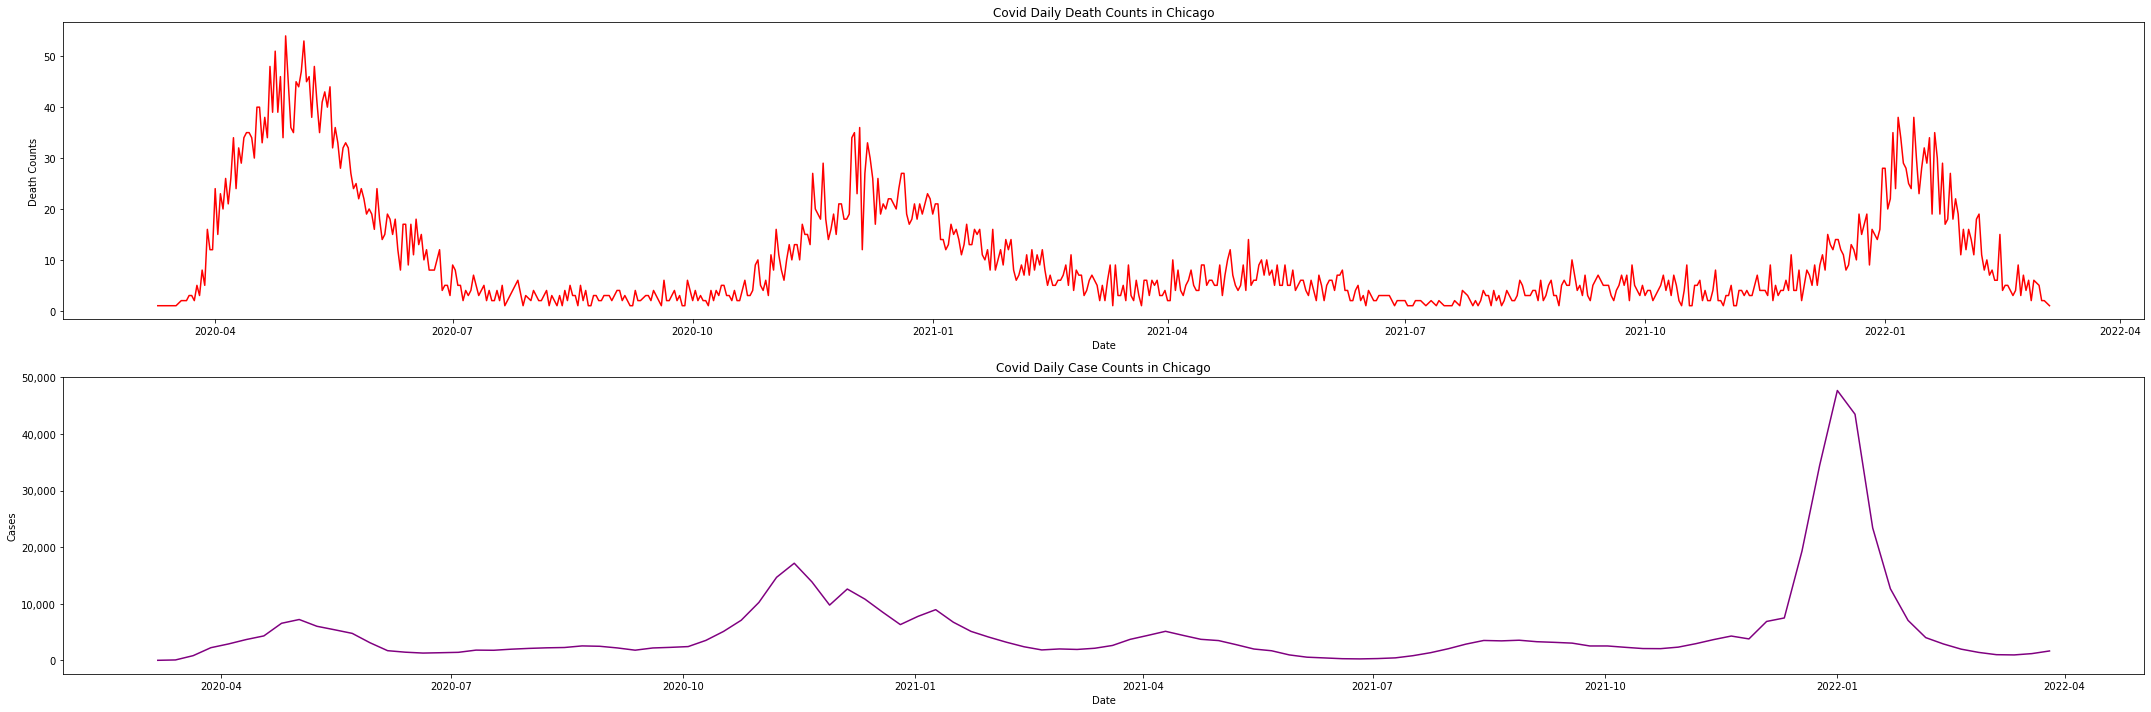

In [6]:
visual = vis.Vis()
visual.lineChart(zipcodes, deathCountByDate, caseCountByDate)

##### Covid cases and death rates in Chicago neighborhoods
(Here, we find out that the neighborhood with zipcode 60604 had the most number of covid cases per 1,000 population. Digging deep we found out that, it's a very small neighboorhood with a population of 749 whereas it had 334 covid cases over the course of last two years. Neighborhoods with zipcode 60707 and 60827 had the least number of covid cases. In case of death rates, the neighborhoods most affected are of zipcodes 60621 and 60649.)

In [7]:
mergedSocCovid[mergedSocCovid.Zipcode==60604][['Zipcode', 'Population', 'Case Counts', 'Case Counts(Per 1000)', 'Death Counts(Per 1000)']]

,Zipcode,Population,Case Counts,Case Counts(Per 1000),Death Counts(Per 1000)
27,60604,729,334,458.161866,2.743484


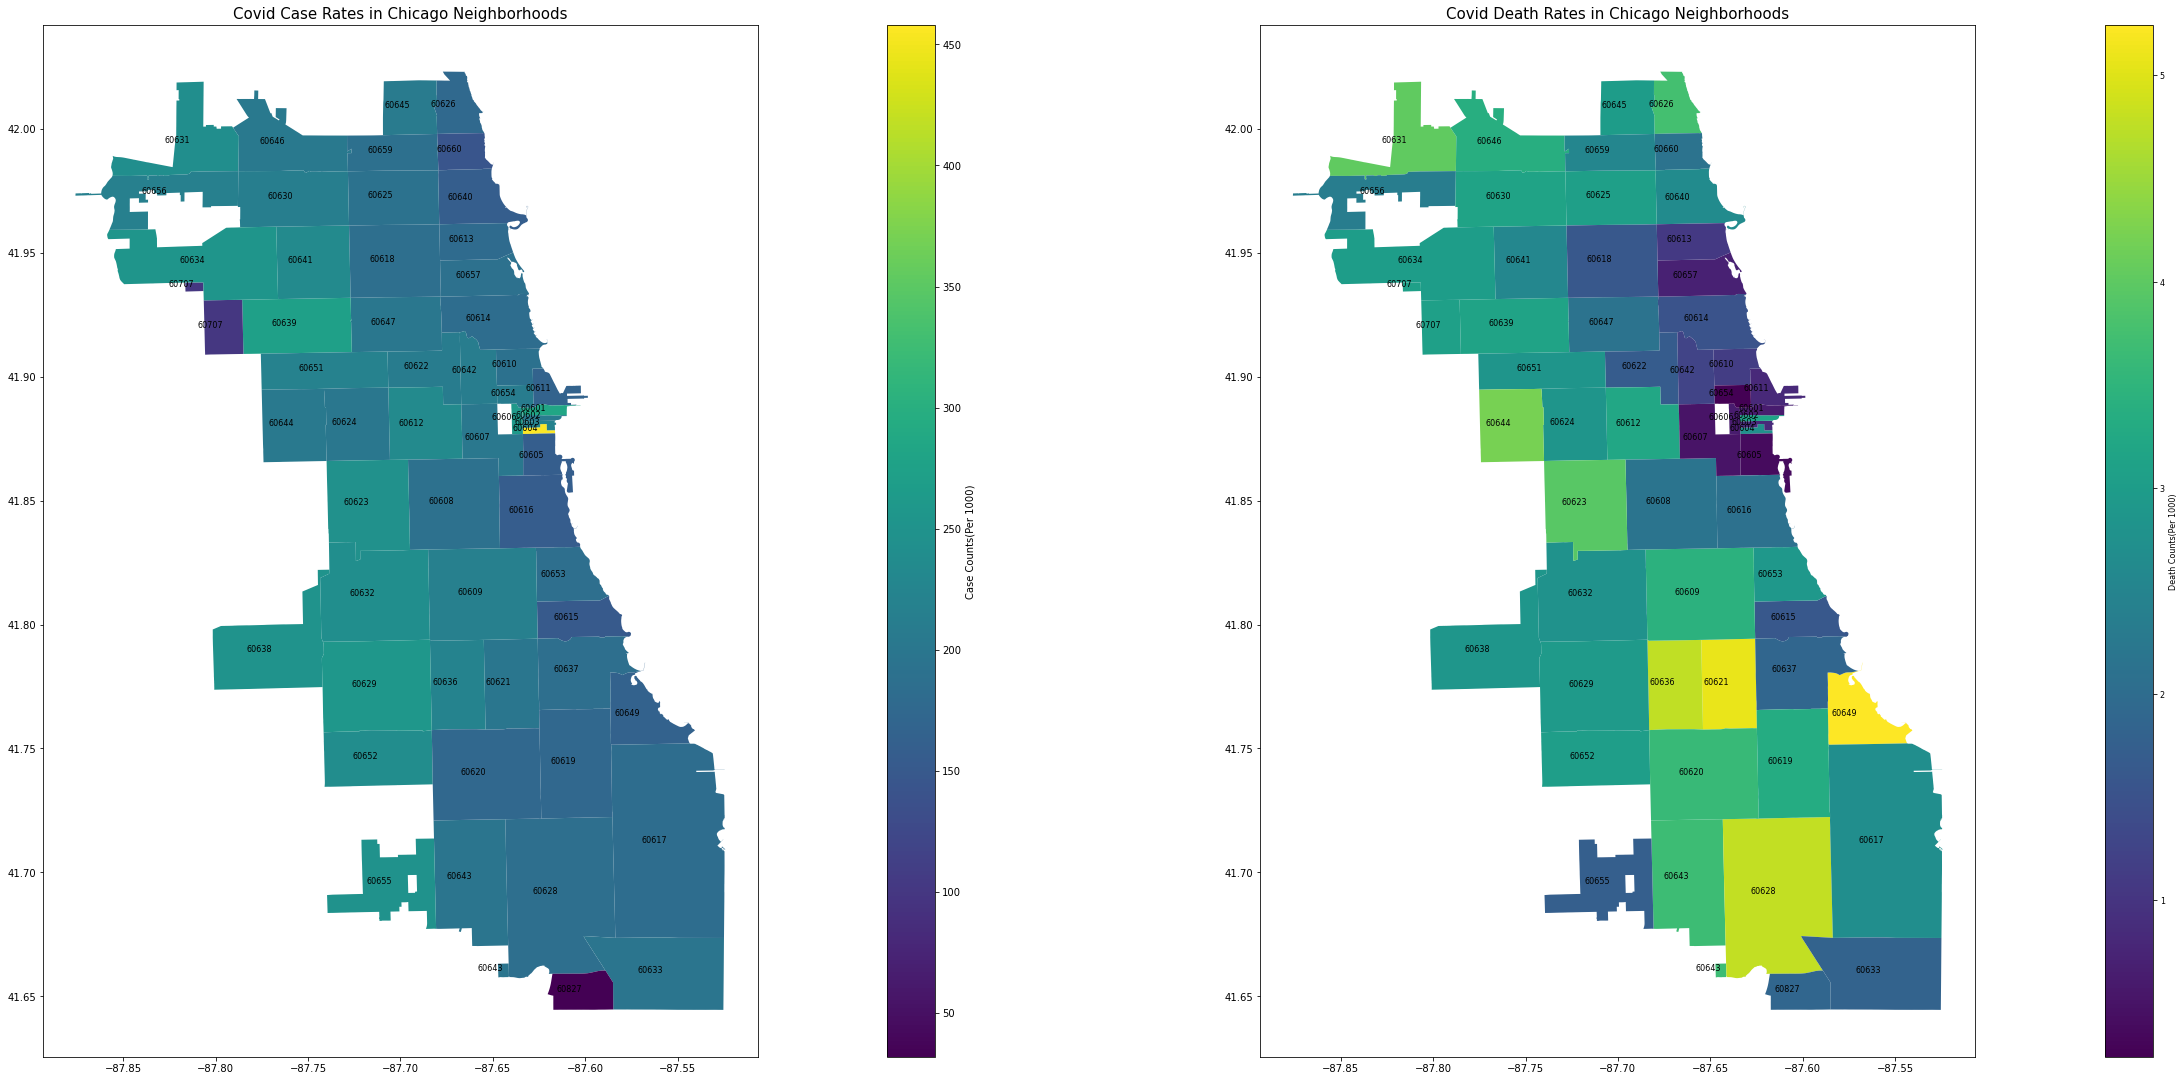

In [8]:
visual.geographicPlot(gdf, mergedSocCovid)

##### Scatter Plot showing correlation between sociodemographic factors and Covid death cases
(As median household income, per capita income or median housing value of a neighboorhood increase, death counts per 1000 population decreases with some exceptions. Meaning, there is some correlation with economic standing of a neighboorhood and the impact of Covid 19.)

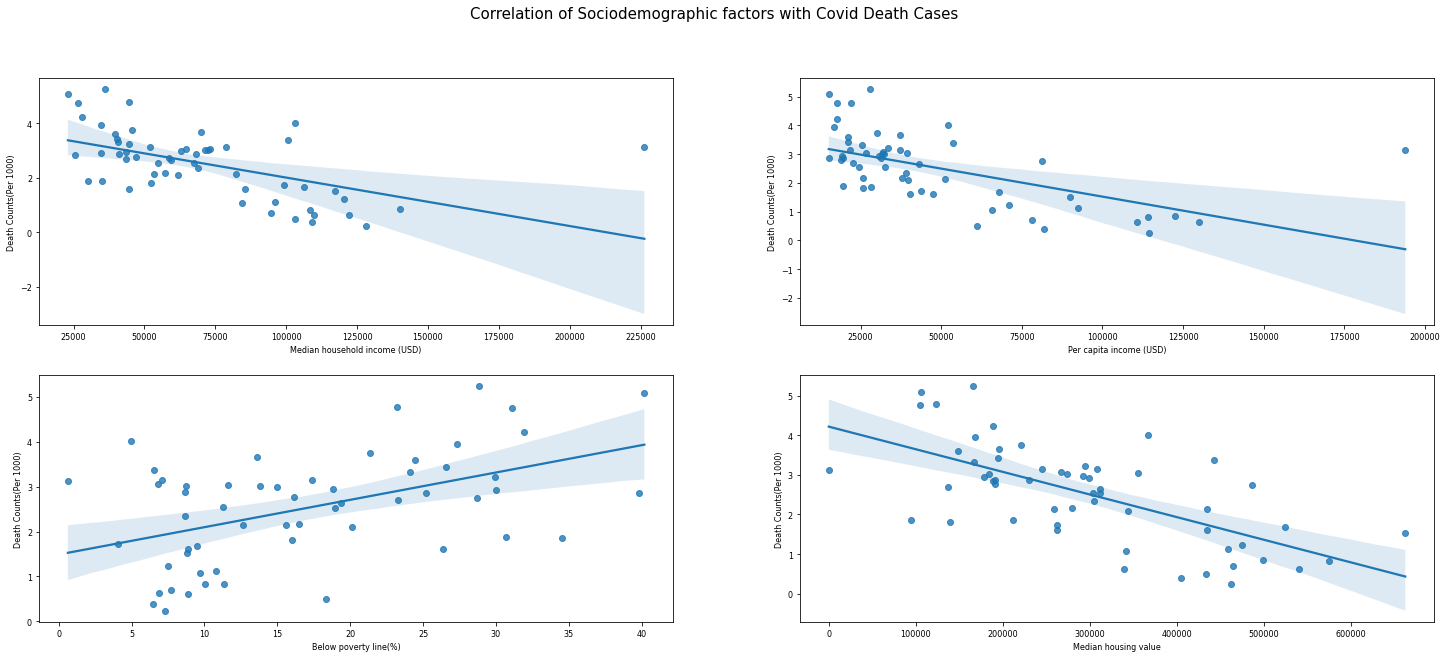

In [9]:
visual.scatterPlot(mergedSocCovid)

##### Bar plot showing feature importance of sociodemographic factors with Covid death cases
(Here, we plotted the correlation of Covid death cases with sociodemographic features. [Note: features with correlation less than 0.5 are discarded])

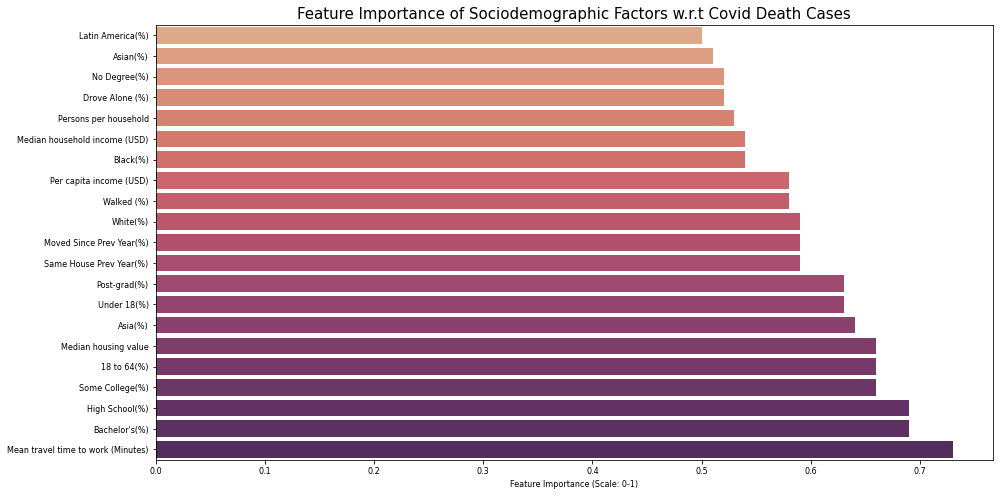

In [10]:
visual.featureImportance(mergedSocCovid)

### ML analysis


**Random Forest Regression Model**

We initially chose to use a random forest regression model (RFR) to predict the number of COVID-19-related deaths per 1000 people within each zipcode as a function of the sociodemographic variables we gathered. As a baseline model, we simply predicted that the number of deaths per 1000 people would be equal to the median for all zipcodes, regardless of other input data. This resulted in an average absolute error rate of 1.02 deaths/1000. 

Prior to model generation, the data was split into training and testing subsets at a ratio of 7:3 (i.e. 70% training data). We used all variables that were individually correlated with deaths/1000 with correlation coefficients > 0.5 as input. Although we attempted to form an RFR with all of the available variables, this did not result in improved predictions.

In order to optimize hyperparameters for the RFR, we used a randomized search strategy across a grid of possible hyperparameter values with repeated K-fold cross validation, using 5 repeats of 2 splits for each randomly-selected combination of hyperparameter values. 

Our RFR with optimized hyperparameters predicted training data with an average absolute error rate of 0.62 deaths/1000, about 60% of the baseline error rate. 

In [29]:
import pandas as pd
from random_forest import *
from optimize_rfr_hyperparams import *

data = pd.read_csv('Chicago-Covid-SocioDemographics-Cases-Deaths.csv')

features, labels = filter_by_cor(data, "Death Counts(Per 1000)", 0.5)
X_train, X_test, y_train, y_test = split(features, labels)

In [ ]:
hyperparam_tuning = optimize_rf(X_train, y_train, random_grid = random_grid)
rf_model = rfr_custom(X_train, y_train, hyperparam_tuning.best_params_)

In [19]:
median_deaths = np.median(y_train)
baseline_pred = np.repeat(median_deaths, len(y_test))
errors = abs(rf_model.predict(X_test) - y_test)
print("Average absolute baseline error = ", round(np.mean(abs(baseline_pred - y_test)), 2), "(deaths per 1000)")
print("Average absolute model error = ", round(np.mean(errors), 2), "(deaths per 1000)")


Average absolute baseline error =  1.02 (deaths per 1000)
Average absolute model error =  0.62 (deaths per 1000)


**Principal Components Analysis**

We also performed principal components analysis (PCA), in order to help visualize the distribution of COVID-19-related death rates in the multivariate sociodemographic dataspace. (Note: as an unsupervised learning technique, there is no baseline to compare the PCA to. That is why a baseline comparison is not discussed here.) 

The variables used for the PCA were the same as the input variables for the RFR above. In order to maintain separation of training and testing partitions formed above, only the training data was used for this analysis. The first two principal components, which together account for 77.47% of total variance between zipcodes, are visualized below. Each point on the plot represents one zipcode, and points are colored by the number of COVID-19-related deaths per 1,000 peope in that zipcode. 

Although there is no obvious clustering of the data, a rough pattern is apparent, wherein the highest death rates are located at low positions on both principal component axes, especially PC 1. This suggests that a pattern related sociodemographic variables to COVID-19-related deaths does exist, and a good model should be able to capture that pattern. However, there is still a substantial amount of noise present in the data. 

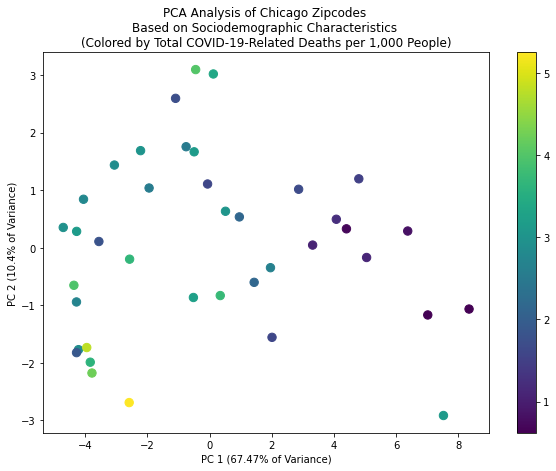

In [36]:
from PCA_analysis import *
data = pd.read_csv('Chicago-Covid-SocioDemographics-Cases-Deaths.csv')
scaled = scale_df(X_train)
pca2, xpca2 = PCA_2(scaled)
pca2.explained_variance_ratio_
plot_pca(xpca2, pca2, y_train, "PCA Analysis of Chicago Zipcodes \nBased on Sociodemographic Characteristics \n(Colored by Total COVID-19-Related Deaths per 1,000 People)", "viridis")

**xGBoost Model**

We also tried a xGBoost model. The features selected were the sociodemographic variables we gathered.
Prior to model generation, the data was split into training and testing subsets at a ratio of 7:3 (i.e. 70% training data).
We used all variables that were individually correlated with deaths/1000 with correlation coefficients > 0.5 as input.
The parameters were not further optimised which leaves a scope for the model to perform better as we work with larger dataset and optimised parameters.

Below is how the model performed


Average absolute baseline error =  0.96 (deaths per 1000)

Average absolute model error =  0.63 (deaths per 1000)

### Reflection: 
The hardest part that we have encountered was the initial exploration process to select the sociodemographic factors from the census data, and identify a subset of them that have impacts on the COVID-19 vulnerability of the neiborhoods in Chicago area. This process was an important milestone to help us check the feasibility of proving our hypotheses and proceed to the next steps of our project. Our initial insights about the data is that the number of COVID-19 cases and deaths are strongly related to the social demographic factors such as population, education, race, age range, means and time of transit, etc.

We have confirmed the correlation between the social demographic factors and mortality related to COVID-19 (21 out of 48 social demographic factors that we selected from census data show strong correlation to COVID-19 mortality rate).

The current biggest problem that we are facing is that the data that we have collected was from Chicago area which has only 60 zipcodes, so there are not enough data points to train an accurate model to predict the vulnerability. We have been searching for the data about the Covid-19 related mortality records in Illinois, but the available datasets only contain records by county whereas our current model is focusing on records by zipcodes.

The results that we have gotten indicate that we are on the right track and also prove our initial hypotheses. The relationship between social demographic factors and Covid-19 vulnerability in Chicago area has been shown by our exploration, so it is worthy to proceed with our project to achieve a better predicting model that can be useful in other areas.

### Next steps: 
We plan to expand our dataset by collecting the data from the whole state of Illinois. By doing this, we will have enough data to train a more accurate model. The available data for death records in Illinois is only by county, so we might scrape the data from the other sources or add data from other major cities to have better dataset. After collecting enough data, we will repeat the whole process that we have done on the dataset for Chicago area and try to achieve a more accurate model.